## Import Libary dan dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/tourism_rating.csv')
df1 = pd.read_csv('/content/tourism_with_id.csv')

## Exploratory Data Analysis

Dataset tourism_rating

In [ ]:
# menampilkan 3 overview dataset df secara random
df.sample(3)

,User_Id,Place_Id,Place_Ratings
2296,71,320,1
5277,160,292,2
62,3,310,3


In [ ]:
# cek dimensi pada dataset df
print("Total Rows: {} dan Cols: {}".format(df.shape[0], df.shape[1]))

Total Rows: 10000 dan Cols: 3


In [ ]:
# cek informasi dari tiap fitur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
# cek total user pada dataset df
len(df['User_Id'].unique())

300

In [ ]:
# cek total place yang diberi rating 
len(df['Place_Id'].unique())

437

In [ ]:
# cek statistika deskripsi dari dataset
df.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Dataset tourism_with_id  

In [ ]:
# menampilkan 3 overview dataset df1 secara random
df1.sample(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
48,49,Galeri Indonesia Kaya,Galeri Indonesia Kaya (disingkat GIK) adalah r...,Budaya,Jakarta,0,4.8,90.0,"{'lat': -6.1948499, 'lng': 106.8200607}",-6.19485,106.820061,NaN,49
279,280,Gereja Tiberias Indonesia Bandung,"Gereja Tiberias Indonesia (GTI), atau Tiberias...",Tempat Ibadah,Bandung,0,4.9,NaN,"{'lat': -6.9347698, 'lng': 107.6253513}",-6.93477,107.625351,NaN,280
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.29433,112.761753,NaN,436


In [ ]:
# cek dimensi pada dataset df1
print("Total Rows: {} dan Cols: {}".format(df1.shape[0], df1.shape[1]))

Total Rows: 437 dan Cols: 13


In [ ]:
# cek informasi dari tiap fitur df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
# cek total place pada dataset df1
len(df1['Place_Id'].unique())

437

In [ ]:
# cek sebaran kota wisata pada dataset
df1['City'].value_counts()

Yogyakarta    126
Bandung       124
Jakarta        84
Semarang       57
Surabaya       46
Name: City, dtype: int64

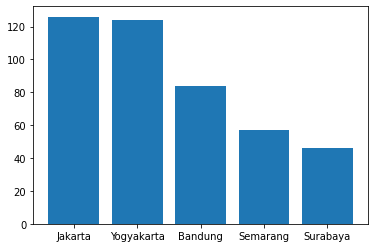

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=df1['City'].unique(),height=df1['City'].value_counts())
plt.show()

<Figure size 1440x720 with 0 Axes>

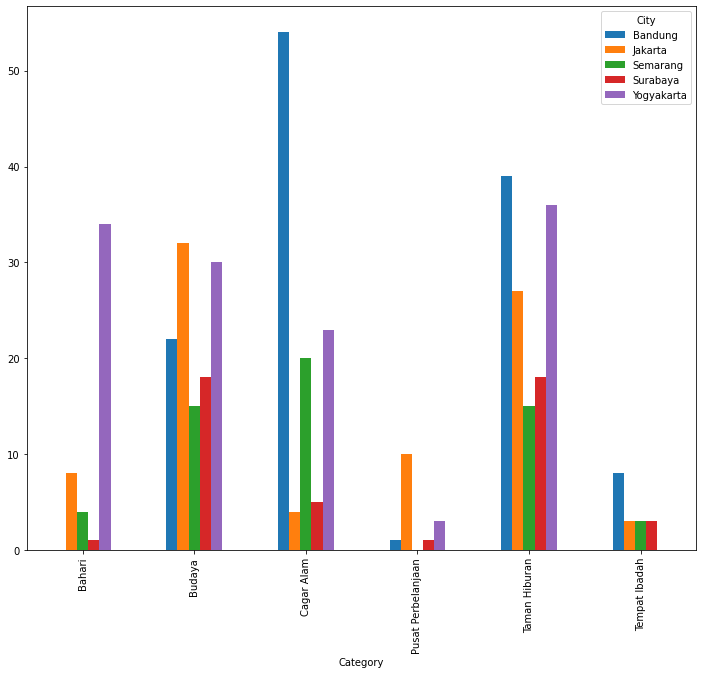

In [ ]:
table = pd.crosstab(df1['Category'], df1['City'])
table.plot(kind="bar", figsize=(12,10))

In [ ]:
# cek statika deskripsi dari dataset
df1.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


## Data Cleaning

Dataset tourism_rating

In [ ]:
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
User_Id,0,0.0
Place_Id,0,0.0
Place_Ratings,0,0.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Place_Ratings'] = df['Place_Ratings'].astype('float')

Dataset tourism_with_id  

In [ ]:
Total = df1.isnull().sum().sort_values(ascending=False)          

Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 11,437,100.000000
Time_Minutes,232,53.089245
Place_Id,0,0.000000
Place_Name,0,0.000000
Description,0,0.000000
Category,0,0.000000
City,0,0.000000
Price,0,0.000000
Rating,0,0.000000
Coordinate,0,0.000000


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.drop(columns=['Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12', 'Time_Minutes', 'Rating', 'Description'], inplace=True)

In [ ]:
df = pd.merge(df, df1, on='Place_Id')

In [ ]:
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price
0,1,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
1,22,179,4.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
2,40,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
3,49,179,5.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
4,74,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000


## Preprocessing

In [ ]:
resto_ids = df['Place_Id'].unique().tolist()
user_ids = df['User_Id'].unique().tolist()

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded userID :  {1: 0, 22: 1, 40: 2, 49: 3, 74: 4, 76: 5, 84: 6, 127: 7, 134: 8, 142: 9, 151: 10, 183: 11, 188: 12, 192: 13, 204: 14, 227: 15, 230: 16, 250: 17, 256: 18, 268: 19, 270: 20, 271: 21, 272: 22, 10: 23, 14: 24, 19: 25, 20: 26, 24: 27, 28: 28, 32: 29, 35: 30, 37: 31, 51: 32, 52: 33, 75: 34, 105: 35, 137: 36, 141: 37, 144: 38, 153: 39, 165: 40, 166: 41, 173: 42, 187: 43, 191: 44, 195: 45, 235: 46, 258: 47, 261: 48, 266: 49, 280: 50, 281: 51, 4: 52, 11: 53, 12: 54, 53: 55, 87: 56, 92: 57, 103: 58, 106: 59, 109: 60, 116: 61, 120: 62, 139: 63, 179: 64, 212: 65, 222: 66, 226: 67, 232: 68, 238: 69, 21: 70, 30: 71, 42: 72, 57: 73, 58: 74, 79: 75, 94: 76, 98: 77, 113: 78, 148: 79, 152: 80, 159: 81, 231: 82, 239: 83, 245: 84, 251: 85, 295: 86, 299: 87, 18: 88, 31: 89, 71: 90, 83: 91, 96: 92, 123: 93, 125: 94, 170: 95, 201: 96, 210: 97, 247: 98, 249: 99, 252: 100, 260: 101, 265: 102, 275: 103, 283: 104, 38: 105, 54: 106, 55: 107, 59: 108, 65: 109, 72: 110, 80: 111, 86: 112, 118: 113,

In [ ]:
# Melakukan proses encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}
 
# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['User_Id'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['place'] = df['Place_Id'].map(resto_to_resto_encoded)

In [ ]:
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price,user,place
0,1,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,0,0
1,22,179,4.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,1,0
2,40,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,2,0
3,49,179,5.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,3,0
4,74,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,4,0


## Modelling

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price,user,place
5268,104,127,4.0,Blue Lagoon Jogja,Taman Hiburan,Yogyakarta,10000,159,221
510,241,76,1.0,Taman Cattleya,Taman Hiburan,Jakarta,20000,248,19
4328,120,28,5.0,Wisata Agro Edukatif Istana Susu Cibugary,Taman Hiburan,Jakarta,35000,62,181
8380,239,356,5.0,Saloka Theme Park,Taman Hiburan,Semarang,150000,83,361
9033,276,273,4.0,Curug Bugbrug,Cagar Alam,Bandung,7500,199,391
...,...,...,...,...,...,...,...,...,...
5734,145,177,3.0,Pantai Parangtritis,Bahari,Yogyakarta,10000,285,242
5191,31,6,2.0,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,89,218
5390,163,94,5.0,Sumur Gumuling,Taman Hiburan,Yogyakarta,7000,129,226
860,262,85,1.0,Taman Pintar Yogyakarta,Taman Hiburan,Yogyakarta,6000,184,33


In [ ]:
min_rating = min(df['Place_Ratings'])
 
# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])


# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['User_Id', 'Place_Id']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[104 127]
 [241  76]
 [120  28]
 ...
 [163  94]
 [262  85]
 [297  38]] [0.75 0.   1.   ... 1.   0.   0.5 ]


In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
# Mendapatkan jumlah user
num_users = len(df['User_Id'])
print(num_users)
 
# Mendapatkan jumlah resto
num_resto = len(df['Place_Id'])
print(num_resto)

model = RecommenderNet(num_users, num_resto, 100) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adagrad(learning_rate=0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

9921
9921


In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 24,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
331/331 [==============================] - 4s 10ms/step - loss: 0.1200 - root_mean_squared_error: 0.3458 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3437
Epoch 2/10
331/331 [==============================] - 4s 11ms/step - loss: 0.1199 - root_mean_squared_error: 0.3457 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3436
Epoch 3/10
331/331 [==============================] - 3s 9ms/step - loss: 0.1198 - root_mean_squared_error: 0.3455 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3436
Epoch 4/10
331/331 [==============================] - 3s 10ms/step - loss: 0.1197 - root_mean_squared_error: 0.3453 - val_loss: 0.1184 - val_root_mean_squared_error: 0.3436
Epoch 5/10
331/331 [==============================] - 3s 9ms/step - loss: 0.1195 - root_mean_squared_error: 0.3452 - val_loss: 0.1184 - val_root_mean_squared_error: 0.3436
Epoch 6/10
331/331 [==============================] - 3s 9ms/step - loss: 0.1195 - root_mean_squared_error: 0.3451 - val_loss: 0.1184 - v

## Evaluation

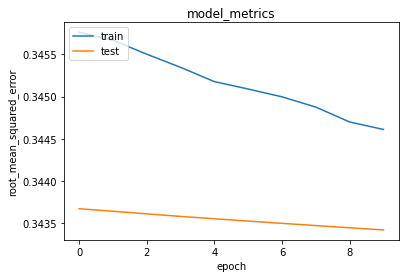

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Testing model

In [ ]:
place_df = df
df2 = df

# Mengambil sample user
user_id = df2.User_Id.sample(1).iloc[0]
resto_visited_by_user = df[df.User_Id == user_id]
resto_not_visited = place_df[~place_df['Place_Id'].isin(resto_visited_by_user.Place_Id.values)]['Place_Id'] 

In [ ]:
resto_visited_by_user['Place_Id'] is resto_not_visited

False

In [ ]:
resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_to_resto_encoded.keys()))
)

In [ ]:
resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [ ]:
ratings = model.predict(user_resto_array).flatten()


13/13 [==============================] - 0s 1ms/step


In [ ]:
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

In [ ]:
resto_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price,user,place
2859,183,143,5.0,Seribu Batu Songgo Langit,Cagar Alam,Yogyakarta,2000,11,117
962,183,107,5.0,Bangsal Pagelaran,Budaya,Yogyakarta,5000,11,37
4061,183,130,5.0,Studio Alam Gamplong,Taman Hiburan,Yogyakarta,10000,11,169
5161,183,186,4.0,Pantai Glagah,Bahari,Yogyakarta,5000,11,216
2905,183,190,4.0,Pantai Samas,Bahari,Yogyakarta,4000,11,119
2595,183,300,4.0,Sanghyang Heuleut,Cagar Alam,Bandung,10000,11,106
478,183,222,4.0,Museum Konferensi Asia Afrika,Budaya,Bandung,0,11,18
3888,183,306,4.0,Sungai Palayangan,Cagar Alam,Bandung,150000,11,162
1815,183,104,3.0,Tebing Breksi,Budaya,Yogyakarta,20000,11,73
8848,183,313,3.0,Taman Begonia,Cagar Alam,Bandung,10000,11,383


In [ ]:
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

resto_df_rows = place_df[place_df['Place_Id'].isin(top_resto_user)].drop_duplicates(subset=['Place_Id'])
for row in resto_df_rows.itertuples():
    print(row.Place_Name, ':', row.City)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_resto = place_df[place_df['Place_Id'].isin(recommended_resto_ids)].drop_duplicates(subset=['Place_Id'])
for row in recommended_resto.itertuples():
    print(row.Place_Name, ':', row.City)

Showing recommendations for users: 183
Resto with high ratings from user
--------------------------------
Pantai Glagah : Yogyakarta
Bangsal Pagelaran : Yogyakarta
Studio Alam Gamplong : Yogyakarta
Seribu Batu Songgo Langit : Yogyakarta
Pantai Samas : Yogyakarta
--------------------------------
Top 10 resto recommendation
--------------------------------
Alun Alun Selatan Yogyakarta : Yogyakarta
NuArt Sculpture Park : Bandung
Museum TNI AL Loka Jala Crana : Surabaya
Sudut Pandang Bandung : Bandung
Situ Patenggang : Bandung
Jembatan Kota Intan : Jakarta
Setu Babakan : Jakarta
Pantai Ngrenehan : Yogyakarta
Pantai Sundak : Yogyakarta
Masjid Istiqlal : Jakarta
